In [37]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8]

### Este modelo nos ajuda a automaticamente interpretar os diagramas de ACF, PACF, melhores médias móveis, etc. Também tem o elemento sazonal

In [38]:
df = pd.read_excel('serie_historica_volume_portos.xlsx')
planta = input("Qual planta e processo para escolher: ")

In [39]:
df_2 = df[df['PLANTA_PROCESSO'] == planta]
df_2.sort_values('DATA')

,PLANTA_PROCESSO,DATA,TOTAL_VALOR
4944,1089 - Tubarão | DESCARGA,2017-08-31 12:00:00,327114.609
3742,1089 - Tubarão | DESCARGA,2017-09-01 12:00:00,313800.501
3769,1089 - Tubarão | DESCARGA,2017-09-02 12:00:00,317138.942
3615,1089 - Tubarão | DESCARGA,2017-09-03 12:00:00,280568.277
4010,1089 - Tubarão | DESCARGA,2017-09-04 12:00:00,248434.039
...,...,...,...
4847,1089 - Tubarão | DESCARGA,2022-08-25 12:00:00,224455.136
5217,1089 - Tubarão | DESCARGA,2022-08-26 12:00:00,196634.351
5546,1089 - Tubarão | DESCARGA,2022-08-27 12:00:00,266354.338
5744,1089 - Tubarão | DESCARGA,2022-08-28 12:00:00,233411.492


In [40]:
df_g = df_2.resample(rule='M', on='DATA')['TOTAL_VALOR'].sum()

## Aplicando o modelo Auto-Arima

In [41]:
from pmdarima.arima import auto_arima

In [42]:
modelo = auto_arima(df_g, start_p=0, start_q=0, max_p=6, max_q=6, m=24, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[24]             : AIC=1147.385, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[24]             : AIC=1125.789, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[24]             : AIC=1126.829, Time=0.42 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=1134.155, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=1127.451, Time=0.16 sec
 ARIMA(0,1,0)(1,1,2)[24]             : AIC=1128.690, Time=1.02 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=1127.186, Time=0.50 sec
 ARIMA(0,1,0)(2,1,1)[24]             : AIC=1128.617, Time=0.75 sec
 ARIMA(0,1,0)(2,1,2)[24]             : AIC=1130.070, Time=1.17 sec
 ARIMA(0,1,1)(0,1,0)[24]             : AIC=1174.709, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[24]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,1)(1,1,0)[24]             : AIC=1133.098, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[24]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[24]             : AIC=inf, Time=2.19 sec
 ARIMA(0,1,1)(2

In [43]:
print(modelo.aic())

1112.5407007990323


In [44]:
treino = df_g.loc['2017-08-31':'2020-08-31']
teste = df_g.loc['2020-09-30':]

In [45]:
modelo.fit(treino)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 24),
      suppress_warnings=True, with_intercept=False)

In [46]:
forecast = modelo.predict(n_periods=24)

In [47]:
forecast = pd.DataFrame(forecast, index=teste.index)

In [48]:
forecast

,0
DATA,
2020-09-30,5.241212e+06
2020-10-31,5.239551e+06
2020-11-30,5.240465e+06
2020-12-31,5.262586e+06
2021-01-31,5.236328e+06
2021-02-28,5.170412e+06
2021-03-31,5.179873e+06
2021-04-30,5.149835e+06
2021-05-31,5.156589e+06


<AxesSubplot: xlabel='DATA'>

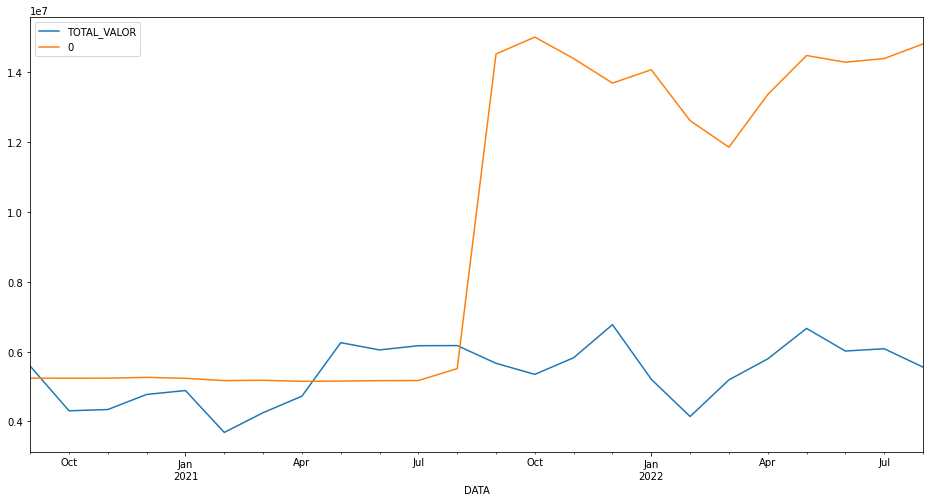

In [49]:
pd.concat([teste,forecast], axis=1).plot()

<AxesSubplot: xlabel='DATA'>

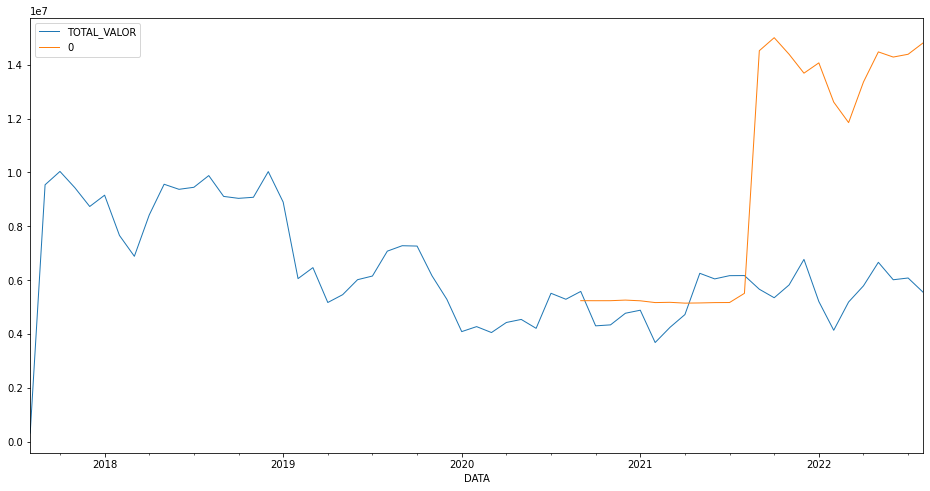

In [50]:
pd.concat([df_g, forecast], axis=1,).plot(linewidth=1)